# Running DataWrangling_12 processes but on all counties in US rather than just NE states
# Running processes in DataWrangling11 but with pm10 pollutants only
* this is the fourth most frequent recorded pollutant from EPA

# Rerun DataWrangling8 processes with alernative datasets from DataWrangling 9

In [2]:
import pandas as pd
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
import klib

from IPython.core.display import display

# pd.set_option('display.max_columns', None)
# pd.reset_optio('max_rows')
#np.set_printoptions(threshold=sys.maxsize)

plt.style.use('dark_background')
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
sns.set(style='ticks', context='talk')

# Load data and constants

In [3]:
def remove_col(df, col_name):
    '''Returns a dataframe with removed column or columns from old dataframe'''
    new_df = df.copy()

    if(type(col_name) != str and len(col_name) > 1):
        for index in col_name:
            new_df = new_df.drop(str(index), axis=1)
    else:
        new_df = new_df.drop(str(col_name), axis=1)
    return new_df

    return NE_States
def get_df_with_geofips(df, state_code, county_code):
    ''' Returns dataframe with geofips column '''
    state_code = df[state_code].astype(str).values
    county_code = df[county_code].astype(str).values

    geofips = []
    for stateID, countyID in zip(state_code, county_code):
        id = ''
        stateLen = len(stateID)
        countyLen = len(countyID)
        if(stateLen < 2):
            id += '0' + stateID
        else:
            id += stateID
        if(countyLen == 1):
            id += '00' + countyID
        elif(countyLen == 2):
            id += '0' + countyID
        else:
            id += countyID
        geofips.append(id)

    df.insert(loc=0, column='GeoFIPS', value=geofips)
    return df

In [4]:
pm10_2017 = pd.read_csv('../../data/raw/PM10_2017.csv')
pm10_2018 = pd.read_csv('../../data/raw/PM10_2018.csv')
pm10_2019 = pd.read_csv('../../data/raw/PM10_2019.csv')

county_incomes = r'../../data/processed/county_incomes_2017_2019'
county_incomes_2017_2019 = pd.read_csv(county_incomes)

educ_vehicle = r'../../data/processed/clean_edu_vehicle_2017_2019.csv'
educ_vehicle_2017_2019 = pd.read_csv(educ_vehicle)

pov_rate = r'../../data/processed/clean_pov_rate_2017_2019.csv'
pov_rate_2017_2019 = pd.read_csv(pov_rate)

unemploy_county_rate = r'../../data/processed/clean_UE_rate_2017_2019.csv'
unemploy_rate_2017_2019 = pd.read_csv(unemploy_county_rate)

county_dem_ratio = r'../../data/processed/clean_county_dem_ratio_2017_2019.csv'
county_dem_ratio_2017_2019 = pd.read_csv(county_dem_ratio)

## Retrieve pm10 data

In [5]:
print(pm10_2017.shape)

(169613, 29)


In [6]:
# add GeoFIPS for NE aqi counties
pm10_2017 = get_df_with_geofips(pm10_2017, 'State Code', 'County Code')
pm10_2018 = get_df_with_geofips(pm10_2018, 'State Code', 'County Code')
pm10_2019 = get_df_with_geofips(pm10_2019, 'State Code', 'County Code')

In [7]:
# Remove unnecessary columns

pm10_2017.columns
cols_to_remove = ['State Code', 'County Code', 'Site Num', 'Parameter Code',
       'POC', 'Latitude', 'Longitude', 'Datum', 'Parameter Name',
       'Sample Duration', 'Pollutant Standard', 'Date Local',
       'Units of Measure', 'Event Type', 'Observation Count',
       'Observation Percent', 'Arithmetic Mean', '1st Max Value',
       '1st Max Hour', 'Method Code', 'Method Name', 'Local Site Name',
       'Address', 'CBSA Name', 'Date of Last Change']

pm10_2017 = remove_col(pm10_2017, cols_to_remove)
pm10_2018 = remove_col(pm10_2018, cols_to_remove)
pm10_2019 = remove_col(pm10_2019, cols_to_remove)

In [8]:
pm10_2017.rename(columns={'AQI':'AQI_2017'}, inplace=True)
pm10_2018.rename(columns={'AQI':'AQI_2018'}, inplace=True)
pm10_2019.rename(columns={'AQI':'AQI_2019'}, inplace=True)

In [9]:
print(pm10_2017.columns)
average_pm10_2017 = pm10_2017.groupby(['GeoFIPS', 'State Name', 'County Name'], as_index=False)[['AQI_2017']].mean()
average_pm10_2018 = pm10_2018.groupby(['GeoFIPS', 'State Name', 'County Name'], as_index=False)[['AQI_2018']].mean()
average_pm10_2019 = pm10_2019.groupby(['GeoFIPS', 'State Name', 'County Name'], as_index=False)[['AQI_2019']].mean()

display(average_pm10_2017)
display(average_pm10_2018)
display(average_pm10_2019)


Index(['GeoFIPS', 'AQI_2017', 'State Name', 'County Name', 'City Name'], dtype='object')


,GeoFIPS,State Name,County Name,AQI_2017
0,01073,Alabama,Jefferson,16.502154
1,01089,Alabama,Madison,11.672996
2,01101,Alabama,Montgomery,13.368852
3,02020,Alaska,Anchorage,13.619235
4,02090,Alaska,Fairbanks North Star,13.541203
...,...,...,...,...
344,72053,Puerto Rico,Fajardo,18.852941
345,72057,Puerto Rico,Guayama,13.375000
346,72061,Puerto Rico,Guaynabo,18.718750
347,72113,Puerto Rico,Ponce,29.253968


,GeoFIPS,State Name,County Name,AQI_2018
0,01073,Alabama,Jefferson,17.511019
1,01089,Alabama,Madison,12.362288
2,01101,Alabama,Montgomery,13.661017
3,02020,Alaska,Anchorage,12.616682
4,02050,Alaska,Bethel,12.010638
...,...,...,...,...
340,56041,Wyoming,Uinta,10.236499
341,72033,Puerto Rico,Catano,19.489691
342,72061,Puerto Rico,Guaynabo,19.000000
343,72113,Puerto Rico,Ponce,24.398551


,GeoFIPS,State Name,County Name,AQI_2019
0,01073,Alabama,Jefferson,20.073389
1,01089,Alabama,Madison,12.958515
2,01101,Alabama,Montgomery,13.125000
3,02020,Alaska,Anchorage,15.844062
4,02050,Alaska,Bethel,10.458599
...,...,...,...,...
335,72053,Puerto Rico,Fajardo,18.100000
336,72057,Puerto Rico,Guayama,17.500000
337,72061,Puerto Rico,Guaynabo,22.470199
338,72113,Puerto Rico,Ponce,25.996951


In [10]:
# Merge avg northeast pm10 data

avg_pm10_2017_2018 = pd.merge(average_pm10_2017, average_pm10_2018, how='inner')
avg_pm10_2017_2019 = pd.merge(avg_pm10_2017_2018, average_pm10_2019, how='inner')
avg_pm10_2017_2019

avg_pm10_2017_2019['GeoFIPS'] = pd.to_numeric(avg_pm10_2017_2019['GeoFIPS'])
avg_pm10_2017_2019.dtypes

GeoFIPS          int64
State Name      object
County Name     object
AQI_2017       float64
AQI_2018       float64
AQI_2019       float64
dtype: object

* Have 3 datasets for individuals years 2017, 2018, 2019

In [11]:
display(avg_pm10_2017_2019)
display(unemploy_rate_2017_2019)
display(pov_rate_2017_2019)
display(educ_vehicle_2017_2019)
display(county_dem_ratio_2017_2019)
display(county_incomes_2017_2019)


,GeoFIPS,State Name,County Name,AQI_2017,AQI_2018,AQI_2019
0,1073,Alabama,Jefferson,16.502154,17.511019,20.073389
1,1089,Alabama,Madison,11.672996,12.362288,12.958515
2,1101,Alabama,Montgomery,13.368852,13.661017,13.125000
3,2020,Alaska,Anchorage,13.619235,12.616682,15.844062
4,2090,Alaska,Fairbanks North Star,13.541203,13.660870,16.720524
...,...,...,...,...,...,...
314,56041,Wyoming,Uinta,10.506186,10.236499,6.627951
315,72033,Puerto Rico,Catano,20.966102,19.489691,22.215247
316,72061,Puerto Rico,Guaynabo,18.718750,19.000000,22.470199
317,72113,Puerto Rico,Ponce,29.253968,24.398551,25.996951


,GeoFIPS,Stabr,area_name,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019
0,1001,AL,"Autauga County, AL",26075,25062,1013,3.9,26196,25261,935,3.6,26172,25458,714,2.7
1,1003,AL,"Baldwin County, AL",92456,88711,3745,4.1,95233,91809,3424,3.6,97328,94675,2653,2.7
2,1005,AL,"Barbour County, AL",8349,7863,486,5.8,8414,7987,427,5.1,8537,8213,324,3.8
3,1007,AL,"Bibb County, AL",8583,8208,375,4.4,8605,8268,337,3.9,8685,8419,266,3.1
4,1009,AL,"Blount County, AL",24822,23824,998,4.0,25069,24201,868,3.5,25331,24655,676,2.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3213,72145,PR,"Vega Baja Municipio, PR",13414,11746,1668,12.4,13117,11750,1367,10.4,13037,11791,1246,9.6
3214,72147,PR,"Vieques Municipio, PR",3027,2589,438,14.5,2718,2269,449,16.5,2585,2406,179,6.9
3215,72149,PR,"Villalba Municipio, PR",7557,6090,1467,19.4,7311,6154,1157,15.8,7406,6231,1175,15.9
3216,72151,PR,"Yabucoa Municipio, PR",9000,7512,1488,16.5,8762,7509,1253,14.3,8691,7552,1139,13.1


,GeoFIPS,Postal Code,Name,"Poverty Estimate, All Ages_2017",90% CI LB All Ages_2017,90% CI UB All Ages_2017,"Poverty Percent, All Ages_2017",90% CI LB percent_2017,90% CI UB percent_2017,"Poverty Estimate, Age 0-17_2017",...,90% CI UB 0-17 percent_2019,"Poverty Estimate, Age 5-17 in Families_2019",90% CI LB 5-17 fam_2019,90% CI UB 5-17 fam_2019,"Poverty Percent, Age 5-17 in Families_2019",90% CI LB 5-17 percent_2019,90% CI UB percent 5-17 percent_2019,Median Household Income_2019,90% CI Lower Bound LB medh inc_2019,90% CI UB medh inc_2019
0,1001,AL,Autauga County,7390.0,6147.0,8633.0,13.4,11.1,15.7,2542.0,...,20.3,1376.0,902.0,1850.0,14.4,9.4,19.4,58233.0,52517.0,63949.0
1,1003,AL,Baldwin County,21199.0,17444.0,24954.0,10.1,8.3,11.9,6734.0,...,17.4,4641.0,3295.0,5987.0,13.3,9.4,17.2,59871.0,54593.0,65149.0
2,1005,AL,Barbour County,7414.0,6325.0,8503.0,33.4,28.5,38.3,2606.0,...,50.8,1468.0,1114.0,1822.0,39.5,30.0,49.0,35972.0,31822.0,40122.0
3,1007,AL,Bibb County,4137.0,3187.0,5087.0,20.2,15.5,24.9,1242.0,...,33.1,808.0,566.0,1050.0,25.2,17.7,32.7,47918.0,42291.0,53545.0
4,1009,AL,Blount County,7343.0,5805.0,8881.0,12.8,10.1,15.5,2484.0,...,25.3,2067.0,1641.0,2493.0,21.4,17.0,25.8,52902.0,46777.0,59027.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3001,56037,WY,Sweetwater County,4253.0,3540.0,4966.0,10.0,8.3,11.7,1509.0,...,13.0,644.0,416.0,872.0,8.2,5.3,11.1,80639.0,73437.0,87841.0
3002,56039,WY,Teton County,1348.0,1021.0,1675.0,5.8,4.4,7.2,296.0,...,7.8,142.0,83.0,201.0,4.7,2.7,6.7,98837.0,86531.0,111143.0
3003,56041,WY,Uinta County,2067.0,1623.0,2511.0,10.2,8.0,12.4,697.0,...,13.1,336.0,193.0,479.0,7.8,4.5,11.1,70756.0,63191.0,78321.0
3004,56043,WY,Washakie County,845.0,632.0,1058.0,10.7,8.0,13.4,260.0,...,18.9,160.0,94.0,226.0,12.3,7.2,17.4,55122.0,50050.0,60194.0


,GeoFIPS,NAME,state,county,POP_2017,EDU_TOT_2017_2017,LESS_HS_TOT_2017_2017,HS_TOT_2017_2017,COL_OR_ASSOC_TOT_2017_2017,BACH_TOT_2017_2017,...,BACH_TOT_2019,GRAD_TOT_2019,VEHICLE_TOT_2019,EDU_TOT_ratio_2019,LESS_HS_TOT_ratio_2019,HS_TOT_ratio_2019,COL_OR_ASSOC_TOT_ratio_2019,BACH_TOT_ratio_2019,GRAD_TOT_ratio_2019,VEHICLE_TOT_ratio_2019
0,36089,"St. Lawrence County, New York",36,89,109623,72555.0,9164.0,25858.0,20091.0,8279.0,...,8684.0,7733.0,33650,67.044737,8.564136,23.762762,19.480230,8.060145,7.177464,31.232597
1,36091,"Saratoga County, New York",36,91,229869,164414.0,10656.0,39033.0,45561.0,37886.0,...,40148.0,30363.0,104085,72.095118,4.492676,17.754924,19.172290,17.466056,13.209172,45.281320
2,36093,"Schenectady County, New York",36,93,155565,107453.0,10085.0,32144.0,35263.0,17210.0,...,22627.0,15566.0,59970,70.183324,5.047682,20.198456,20.343982,14.569959,10.023245,38.615831
3,36101,"Steuben County, New York",36,101,96281,68011.0,6510.0,25920.0,20685.0,7451.0,...,8066.0,8475.0,35505,71.044989,6.093585,25.791841,21.817171,8.456788,8.885604,37.225175
4,36103,"Suffolk County, New York",36,103,1492953,1036946.0,102621.0,277080.0,279213.0,208064.0,...,214035.0,182346.0,629360,70.148605,6.397598,18.389192,18.517663,14.495114,12.349037,42.622211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,36079,"Putnam County, New York",36,79,99323,71447.0,5090.0,20597.0,18095.0,14929.0,...,15240.0,12261.0,42420,73.443857,5.721115,19.355167,20.396664,15.500407,12.470504,43.144833
832,36081,"Queens County, New York",36,81,2358582,1695302.0,304984.0,493794.0,372885.0,335990.0,...,334272.0,207624.0,387870,72.484558,12.328372,19.812340,16.300805,14.831103,9.211938,17.209159
833,36083,"Rensselaer County, New York",36,83,159722,111047.0,9095.0,31730.0,34954.0,20143.0,...,20896.0,18203.0,65615,70.327759,5.902441,19.919478,19.870963,13.165820,11.469058,41.341659
834,36085,"Richmond County, New York",36,85,479458,334079.0,39031.0,100730.0,83679.0,66108.0,...,71914.0,48875.0,128740,70.041143,7.701258,20.426427,16.545240,15.103446,10.264773,27.038096


,GeoFIPS,STNAME,CTYNAME,TOT_POP_2017,TOT_MALE_2017,TOT_FEMALE_2017,WA_MALE_2017,WA_FEMALE_2017,BA_MALE_2017,BA_FEMALE_2017,...,HWAC_MALE_ratio_2019,HWAC_FEMALE_ratio_2019,HBAC_MALE_ratio_2019,HBAC_FEMALE_ratio_2019,HIAC_MALE_ratio_2019,HIAC_FEMALE_ratio_2019,HAAC_MALE_ratio_2019,HAAC_FEMALE_ratio_2019,HNAC_MALE_ratio_2019,HNAC_FEMALE_ratio_2019
0,1001,Alabama,Autauga County,55390,27010,28380,20876,21705,5139,5636,...,1.392543,1.229662,0.159301,0.166461,0.071596,0.048327,0.026849,0.034008,0.028638,0.019689
1,1003,Alabama,Baldwin County,212521,103218,109303,90360,95215,9279,9973,...,2.304308,2.081224,0.120053,0.125877,0.118262,0.088248,0.030909,0.029117,0.024638,0.015679
2,1005,Alabama,Barbour County,25157,13230,11927,6533,5918,6360,5744,...,2.061897,1.652759,0.255205,0.202544,0.247104,0.105323,0.004051,0.000000,0.056712,0.032407
3,1007,Alabama,Bibb County,22550,12056,10494,8853,8453,2996,1848,...,1.299455,1.129767,0.142895,0.084844,0.026793,0.066982,0.022327,0.004465,0.075913,0.013396
4,1009,Alabama,Blount County,57787,28449,29338,27301,28144,488,450,...,4.831737,4.350984,0.131429,0.100301,0.115865,0.114136,0.031128,0.036316,0.058797,0.036316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,Wyoming,Sweetwater County,43464,22438,21026,21098,19776,342,254,...,7.843091,7.077911,0.196018,0.172402,0.500673,0.462886,0.077935,0.085020,0.037787,0.021255
3138,56039,Wyoming,Teton County,23384,12133,11251,11592,10705,95,56,...,7.577566,6.725196,0.106546,0.098023,0.447494,0.345210,0.068190,0.063928,0.051142,0.029833
3139,56041,Wyoming,Uinta County,20431,10339,10092,9884,9625,79,84,...,4.153070,4.153070,0.084050,0.113715,0.405419,0.548799,0.014832,0.059330,0.039553,0.009888
3140,56043,Wyoming,Washakie County,8010,4055,3955,3865,3735,23,18,...,6.559898,6.265215,0.089686,0.115311,0.691864,0.755926,0.089686,0.102498,0.051249,0.025625


,GeoFIPS,GeoName,Personal income (thousands of dollars) 2017,Personal income (thousands of dollars) 2018,Personal income (thousands of dollars) 2019,Per capita personal income (dollars) 2017,Per capita personal income (dollars) 2018,Per capita personal income (dollars) 2019
0,0,United States,1.693758e+10,1.783926e+10,1.854226e+10,52118.0,54606.0,56490.0
1,1000,Alabama,1.999998e+08,2.087527e+08,2.164490e+08,41030.0,42710.0,44145.0
2,1001,"Autauga, AL",2.276561e+06,2.360366e+06,2.453617e+06,41101.0,42504.0,43917.0
3,1003,"Baldwin, AL",9.471242e+06,1.006597e+07,1.060026e+07,44566.0,46205.0,47485.0
4,1005,"Barbour, AL",8.381840e+05,8.721890e+05,8.828340e+05,33318.0,35067.0,35763.0
...,...,...,...,...,...,...,...,...
3193,94000,Plains,1.055029e+09,1.107630e+09,1.146515e+09,49609.0,51879.0,53509.0
3194,95000,Southeast,3.818755e+09,4.022276e+09,4.173677e+09,45657.0,47715.0,49159.0
3195,96000,Southwest,1.924648e+09,2.051027e+09,2.144764e+09,46531.0,49045.0,50670.0
3196,97000,Rocky Mountain,6.029942e+08,6.476007e+08,6.803901e+08,49991.0,52936.0,54873.0


## Make one df of 2017
* Cleaning for datasets were done in Data_Wrangling4 and Data_Wrangling7 files
* So only transforming datasets into one will work

In [12]:
avg_pm10_2017 = avg_pm10_2017_2019.iloc[:,:4]
unemploy_rate_2017 = unemploy_rate_2017_2019.iloc[:, [0, 3, 4, 5, 6]]

pov_col_2017 = list(pov_rate_2017_2019.columns[0:1]) + list(pov_rate_2017_2019.columns[3:24])
pov_rate_2017 = pov_rate_2017_2019.loc[:, pov_col_2017]

county_incomes_2017 = county_incomes_2017_2019.iloc[:, [0, 2, 5]]

educ_vehicle_2017_col = list(educ_vehicle_2017_2019.columns[0:1]) + list(educ_vehicle_2017_2019.columns[4:19])
educ_vehicle_2017 = educ_vehicle_2017_2019.loc[:, educ_vehicle_2017_col]

dem_ratio_2017_col = list(county_dem_ratio_2017_2019.columns[0:1]) + list(county_dem_ratio_2017_2019.columns[3:148])
dem_ratio_2017 = county_dem_ratio_2017_2019.loc[:, dem_ratio_2017_col]

In [13]:
avg_pm10_unemploy_2017 = pd.merge(avg_pm10_2017, unemploy_rate_2017, how='inner')
avg_pm10_unemploy_pov_2017 = pd.merge(avg_pm10_unemploy_2017, pov_rate_2017, how='inner')
avg_pm10_unemploy_pov_inc_2017 = pd.merge(avg_pm10_unemploy_pov_2017, county_incomes_2017, how='inner')
avg_pm10_unemploy_pov_inc_educ_veh_2017 = pd.merge(avg_pm10_unemploy_pov_inc_2017, educ_vehicle_2017, how='inner')
df_2017 = pd.merge(avg_pm10_unemploy_pov_inc_educ_veh_2017, dem_ratio_2017, how='inner')

df_2017

,GeoFIPS,State Name,County Name,AQI_2017,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,"Poverty Estimate, All Ages_2017",90% CI LB All Ages_2017,...,HWAC_MALE_ratio_2017,HWAC_FEMALE_ratio_2017,HBAC_MALE_ratio_2017,HBAC_FEMALE_ratio_2017,HIAC_MALE_ratio_2017,HIAC_FEMALE_ratio_2017,HAAC_MALE_ratio_2017,HAAC_FEMALE_ratio_2017,HNAC_MALE_ratio_2017,HNAC_FEMALE_ratio_2017
0,1073,Alabama,Jefferson,16.502154,311481,298227,13254,4.3,107752.0,99555.0,...,1.840361,1.588996,0.169952,0.171771,0.056701,0.045482,0.016980,0.013038,0.017890,0.013645
1,1089,Alabama,Madison,11.672996,176562,169711,6851,3.9,44979.0,39979.0,...,2.238765,2.037251,0.260669,0.277807,0.106147,0.090391,0.035659,0.041740,0.020179,0.019073
2,1101,Alabama,Montgomery,13.368852,106155,101555,4600,4.3,46315.0,41097.0,...,1.503971,1.327965,0.279409,0.271049,0.097683,0.112644,0.045322,0.045322,0.042681,0.043561
3,4001,Arizona,Apache,15.027397,20361,18274,2087,10.2,23426.0,21195.0,...,2.369138,1.990356,0.055909,0.060102,0.970019,1.011951,0.039136,0.041932,0.008386,0.005591
4,4003,Arizona,Cochise,21.075314,49327,46592,2735,5.5,19219.0,15585.0,...,16.694163,16.883169,0.462904,0.454094,0.714377,0.673533,0.224244,0.232253,0.105715,0.096905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,55027,Wisconsin,Dodge,9.319249,48430,47025,1405,2.9,7001.0,5904.0,...,2.548315,1.998746,0.080953,0.068411,0.094635,0.059290,0.020523,0.022804,0.009121,0.009121
204,55079,Wisconsin,Milwaukee,12.681905,475142,456025,19117,4.0,177959.0,169042.0,...,6.869809,6.574073,0.632938,0.646936,0.310049,0.313838,0.072197,0.079354,0.017997,0.017576
205,55133,Wisconsin,Waukesha,12.710843,226155,219636,6519,2.9,19090.0,16633.0,...,2.266406,2.199307,0.076328,0.092293,0.074832,0.076328,0.031429,0.029933,0.013719,0.009978
206,56021,Wyoming,Laramie,10.420240,48230,46472,1758,3.6,9294.0,7767.0,...,7.126666,6.550312,0.264289,0.250058,0.433028,0.424896,0.113848,0.112831,0.044726,0.028462


* df_2017 contains data on NorthEastern counties of the US
* The columns of df_2017 go from average aqi, unemployment rate, poverty rate, education attainment ratio, total vehicle ratio, demographic ratios


<AxesSubplot:title={'center':'Feature-correlation (spearman)'}>

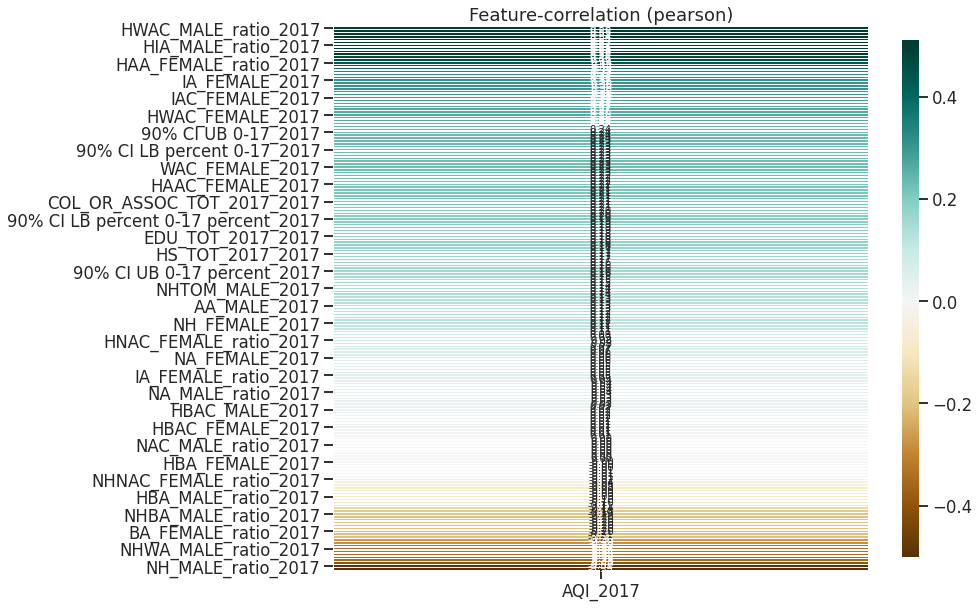

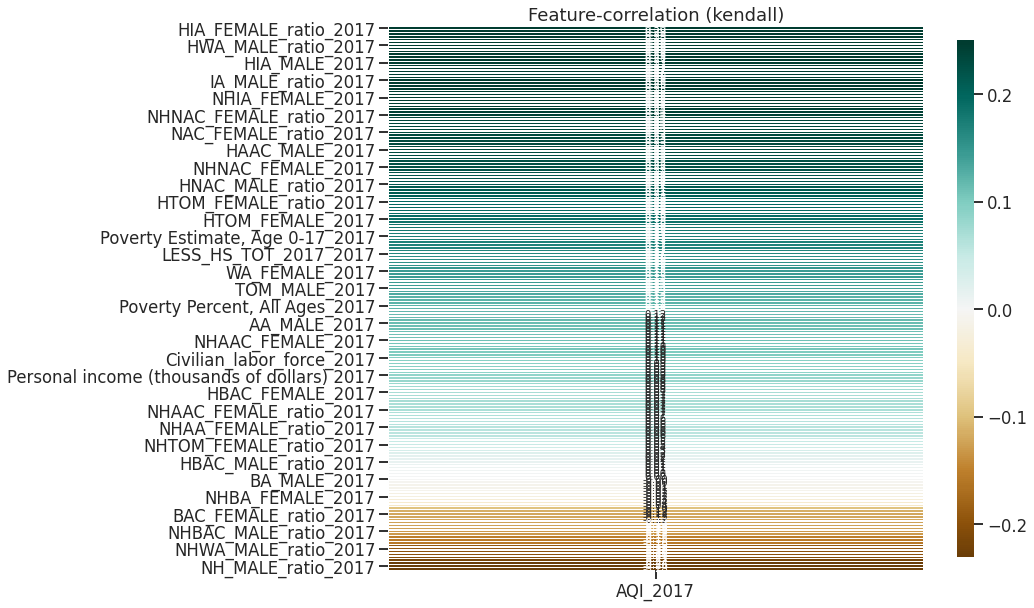

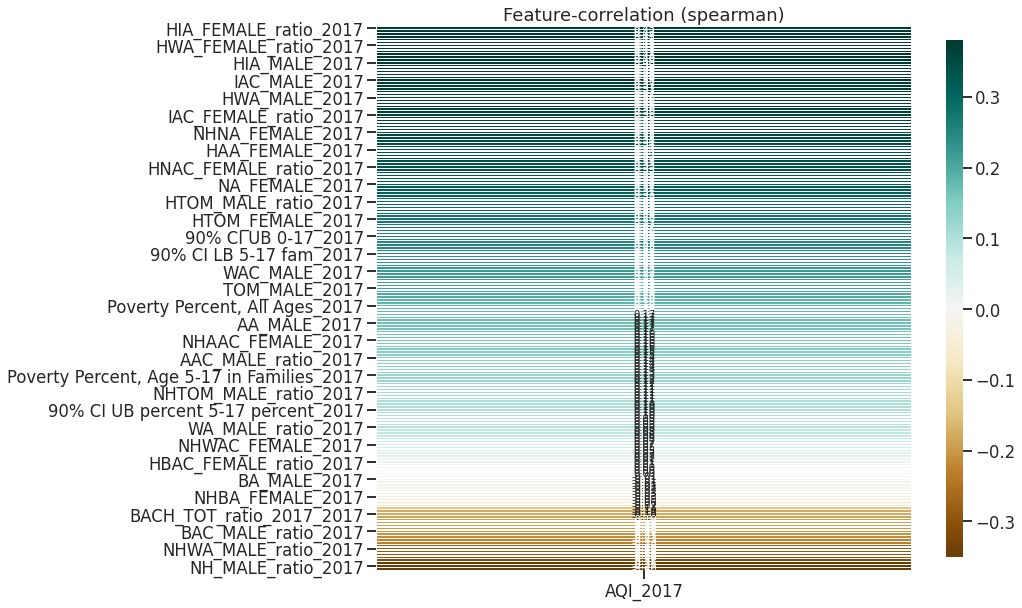

In [14]:
klib.corr_plot(df_2017, target='AQI_2017', method='pearson')
klib.corr_plot(df_2017, target='AQI_2017', method='kendall')
klib.corr_plot(df_2017, target='AQI_2017', method='spearman')

## Make one df of 2018
* Cleaning for datasets were done in Data_Wrangling4 and Data_Wrangling7 files
* So only transforming datasets into one will work

In [15]:
avg_pm10_2018 = avg_pm10_2017_2019.iloc[:, [0, 1, 2, 4]]

unemploy_col_2018 = list(unemploy_rate_2017_2019.columns[0:1]) + list(unemploy_rate_2017_2019.columns[7:11])
unemploy_rate_2018 = unemploy_rate_2017_2019.loc[:, unemploy_col_2018]

pov_col_2018 = list(pov_rate_2017_2019.columns[0:1]) + list(pov_rate_2017_2019.columns[24:45])
pov_rate_2018 = pov_rate_2017_2019.loc[:, pov_col_2018]

incomes_2018 = county_incomes_2017_2019.iloc[:, [0, 3, 6]]

educ_vehicle_2018_col = list(educ_vehicle_2017_2019.columns[0:1]) + list(educ_vehicle_2017_2019.columns[19:34])
educ_vehicle_2018 = educ_vehicle_2017_2019.loc[:, educ_vehicle_2018_col]

county_dem_ratio_2018_col = list(county_dem_ratio_2017_2019.columns[0:1]) + list(county_dem_ratio_2017_2019.columns[148:293])
county_dem_ratio_2018 = county_dem_ratio_2017_2019.loc[:, county_dem_ratio_2018_col]

In [16]:
avg_pm10_unemploy_2018 = pd.merge(avg_pm10_2018, unemploy_rate_2018, how='inner')
avg_pm10_unemploy_pov_2018 = pd.merge(avg_pm10_unemploy_2018, pov_rate_2018, how='inner')
avg_pm10_unemploy_pov_inc_2018 = pd.merge(avg_pm10_unemploy_pov_2018, incomes_2018, how='inner')
avg_pm10_unemploy_pov_inc_educ_veh_2018 = pd.merge(avg_pm10_unemploy_pov_inc_2018, educ_vehicle_2018, how='inner')
df_2018 = pd.merge(avg_pm10_unemploy_pov_inc_educ_veh_2018, county_dem_ratio_2018, how='inner')

df_2018

,GeoFIPS,State Name,County Name,AQI_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,"Poverty Estimate, All Ages_2018",90% CI LB All Ages_2018,...,HWAC_MALE_ratio_2018,HWAC_FEMALE_ratio_2018,HBAC_MALE_ratio_2018,HBAC_FEMALE_ratio_2018,HIAC_MALE_ratio_2018,HIAC_FEMALE_ratio_2018,HAAC_MALE_ratio_2018,HAAC_FEMALE_ratio_2018,HNAC_MALE_ratio_2018,HNAC_FEMALE_ratio_2018
0,1073,Alabama,Jefferson,17.511019,315793,304248,11545,3.7,103604.0,95029.0,...,1.881780,1.642027,0.173180,0.182885,0.057474,0.049588,0.018804,0.014255,0.016833,0.013497
1,1089,Alabama,Madison,12.362288,181565,175352,6213,3.4,42667.0,37832.0,...,2.302427,2.110876,0.255856,0.291550,0.104359,0.095639,0.033787,0.039237,0.018256,0.018528
2,1101,Alabama,Montgomery,13.661017,105953,101782,4171,3.9,43567.0,38512.0,...,1.520503,1.358916,0.283880,0.286971,0.101543,0.109932,0.047240,0.043266,0.041500,0.040176
3,4001,Arizona,Apache,13.913165,20491,18485,2006,9.8,26435.0,24497.0,...,2.368571,2.018653,0.057158,0.061340,1.016297,1.076243,0.044611,0.041823,0.008365,0.011153
4,4003,Arizona,Cochise,18.148405,49482,46751,2731,5.5,18273.0,14986.0,...,16.642539,16.876696,0.461985,0.455657,0.704053,0.689022,0.215171,0.246814,0.106003,0.100466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,55027,Wisconsin,Dodge,10.886525,47964,46703,1261,2.6,7283.0,5977.0,...,2.628852,2.048205,0.091082,0.070589,0.088805,0.069450,0.019355,0.023909,0.007970,0.013662
204,55079,Wisconsin,Milwaukee,14.358757,468452,451475,16977,3.6,177263.0,168055.0,...,7.050284,6.776885,0.644583,0.663274,0.316695,0.320602,0.073498,0.079728,0.020275,0.018797
205,55133,Wisconsin,Waukesha,16.010363,225674,219707,5967,2.6,19937.0,17306.0,...,2.295775,2.248573,0.080244,0.095647,0.077760,0.080741,0.032545,0.031303,0.011925,0.009689
206,56021,Wyoming,Laramie,11.341549,48190,46397,1793,3.7,8839.0,7212.0,...,7.079351,6.603955,0.275123,0.258939,0.419764,0.412684,0.138573,0.123401,0.044505,0.032367


* df_2018 contains data on NorthEastern counties of the US
* The columns of df_2018 go from average aqi, unemployment rate, poverty rate, education attainment ratio, total vehicle ratio, demographic ratios

<AxesSubplot:title={'center':'Feature-correlation (spearman)'}>

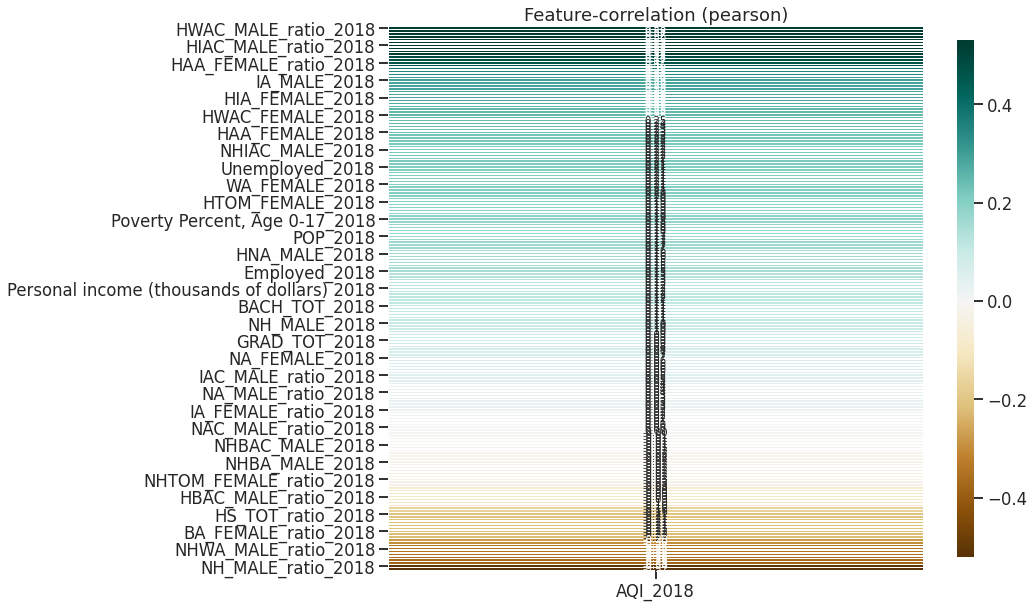

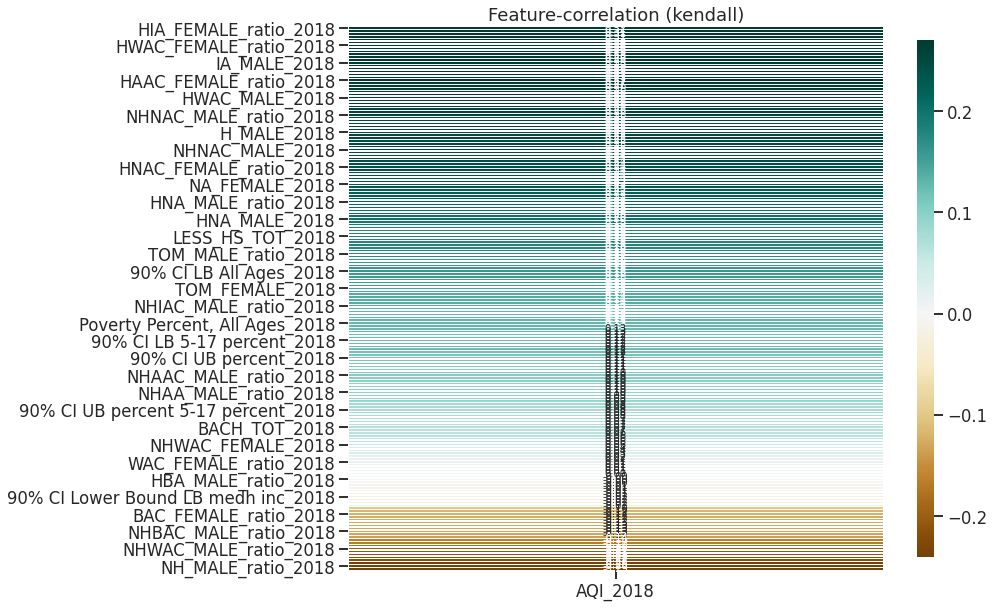

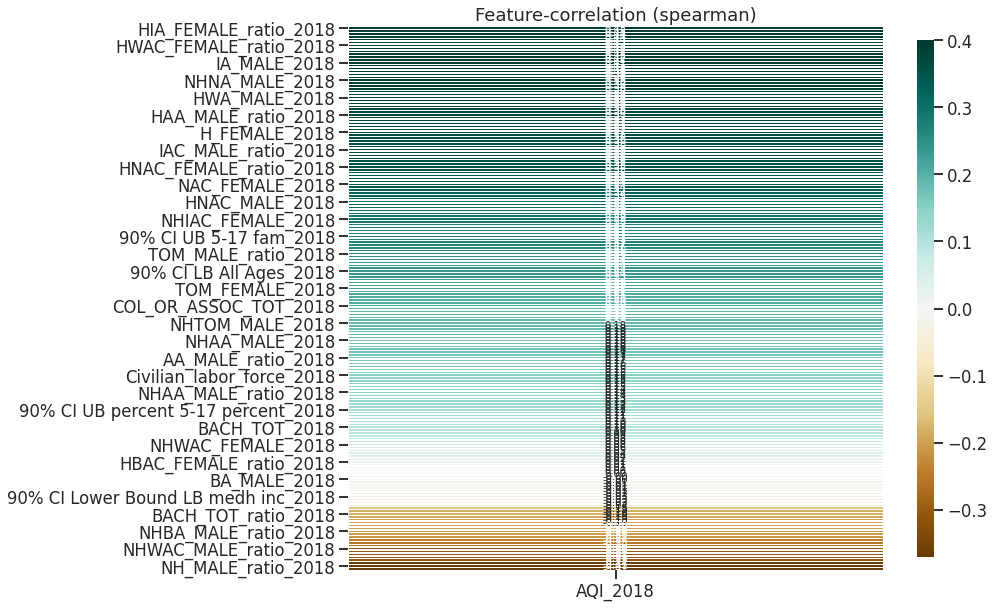

In [17]:
klib.corr_plot(df_2018, target='AQI_2018', method='pearson')
klib.corr_plot(df_2018, target='AQI_2018', method='kendall')
klib.corr_plot(df_2018, target='AQI_2018', method='spearman')

## Make one df of 2019
* Cleaning for datasets were done in Data_Wrangling4 and Data_Wrangling7 files
* So only transforming datasets into one will work

In [18]:
avg_pm10_2019 = avg_pm10_2017_2019.iloc[:,[0, 1, 2, 5]]

unemploy_col_2019 = list(unemploy_rate_2017_2019.columns[0:1]) + list(unemploy_rate_2017_2019.columns[11:])
unemploy_rate_2019 = unemploy_rate_2017_2019.loc[:, unemploy_col_2019]

pov_col_2019 = list(pov_rate_2017_2019.columns[0:1]) + list(pov_rate_2017_2019.columns[45:])
pov_rate_2019 = pov_rate_2017_2019.loc[:, pov_col_2019]

incomes_2019 = county_incomes_2017_2019.iloc[:, [0, 4, 7]]

educ_vehicle_2019_col = list(educ_vehicle_2017_2019.columns[0:1]) + list(educ_vehicle_2017_2019.columns[34:])
educ_vehicle_2019 = educ_vehicle_2017_2019.loc[:, educ_vehicle_2019_col]

county_dem_ratio_2019_col = list(county_dem_ratio_2017_2019.columns[0:1]) + list(county_dem_ratio_2017_2019.columns[293:])
county_dem_ratio_2019 = county_dem_ratio_2017_2019.loc[:, county_dem_ratio_2019_col]

In [19]:
avg_pm10_unemploy_2019 = pd.merge(avg_pm10_2019, unemploy_rate_2019, how='inner')
avg_pm10_unemploy_pov_2019 = pd.merge(avg_pm10_unemploy_2019, pov_rate_2019, how='inner')
avg_pm10_unemploy_pov_inc_2019 = pd.merge(avg_pm10_unemploy_pov_2019, incomes_2019, how='inner')
avg_pm10_unemploy_pov_inc_educ_veh_2019 = pd.merge(avg_pm10_unemploy_pov_inc_2019, educ_vehicle_2019, how='inner')
df_2019 = pd.merge(avg_pm10_unemploy_pov_inc_educ_veh_2019, county_dem_ratio_2019, how='inner')

df_2019

,GeoFIPS,State Name,County Name,AQI_2019,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,"Poverty Estimate, All Ages_2019",90% CI LB All Ages_2019,...,HWAC_MALE_ratio_2019,HWAC_FEMALE_ratio_2019,HBAC_MALE_ratio_2019,HBAC_FEMALE_ratio_2019,HIAC_MALE_ratio_2019,HIAC_FEMALE_ratio_2019,HAAC_MALE_ratio_2019,HAAC_FEMALE_ratio_2019,HNAC_MALE_ratio_2019,HNAC_FEMALE_ratio_2019
0,1073,Alabama,Jefferson,20.073389,318755,309664,9091,2.9,104288.0,95487.0,...,1.931601,1.694117,0.178872,0.190260,0.060586,0.053297,0.021106,0.013666,0.017766,0.013818
1,1089,Alabama,Madison,12.958515,185219,180505,4714,2.5,41789.0,37046.0,...,2.353121,2.174257,0.265480,0.296319,0.103779,0.100561,0.030839,0.048805,0.019576,0.016894
2,1101,Alabama,Montgomery,13.125000,105777,102517,3260,3.1,34268.0,28635.0,...,1.559037,1.402736,0.283461,0.305096,0.101993,0.104642,0.042828,0.044153,0.041062,0.041504
3,4001,Arizona,Apache,11.247911,20487,18468,2019,9.9,23680.0,21200.0,...,2.469153,2.046267,0.062598,0.054252,1.053042,1.053042,0.037559,0.047296,0.012520,0.012520
4,4003,Arizona,Cochise,17.413408,50594,47695,2899,5.7,20172.0,16957.0,...,16.791347,16.901733,0.461397,0.433602,0.717905,0.680580,0.231095,0.243802,0.108003,0.092121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,55027,Wisconsin,Dodge,10.503937,47544,46107,1437,3.0,6512.0,5410.0,...,2.651442,2.127756,0.095630,0.077414,0.091076,0.069445,0.026184,0.025046,0.009108,0.011384
204,55079,Wisconsin,Milwaukee,14.431990,466908,448251,18657,4.0,156647.0,147199.0,...,7.161165,6.882860,0.653572,0.676306,0.319120,0.322821,0.073383,0.080362,0.020619,0.018822
205,55133,Wisconsin,Waukesha,15.656425,224731,218151,6580,2.9,18915.0,16096.0,...,2.343406,2.297884,0.083870,0.098467,0.085602,0.085354,0.036368,0.037111,0.012618,0.012123
206,56021,Wyoming,Laramie,13.354142,48491,46813,1678,3.5,9194.0,7774.0,...,7.128643,6.737688,0.269347,0.271357,0.423116,0.405025,0.135678,0.125628,0.053266,0.045226


* df_2019 contains data on NorthEastern counties of the US
* The columns of df_2019 go from average aqi, unemployment rate, poverty rate, education attainment ratio, total vehicle ratio, demographic ratios

<AxesSubplot:title={'center':'Feature-correlation (spearman)'}>

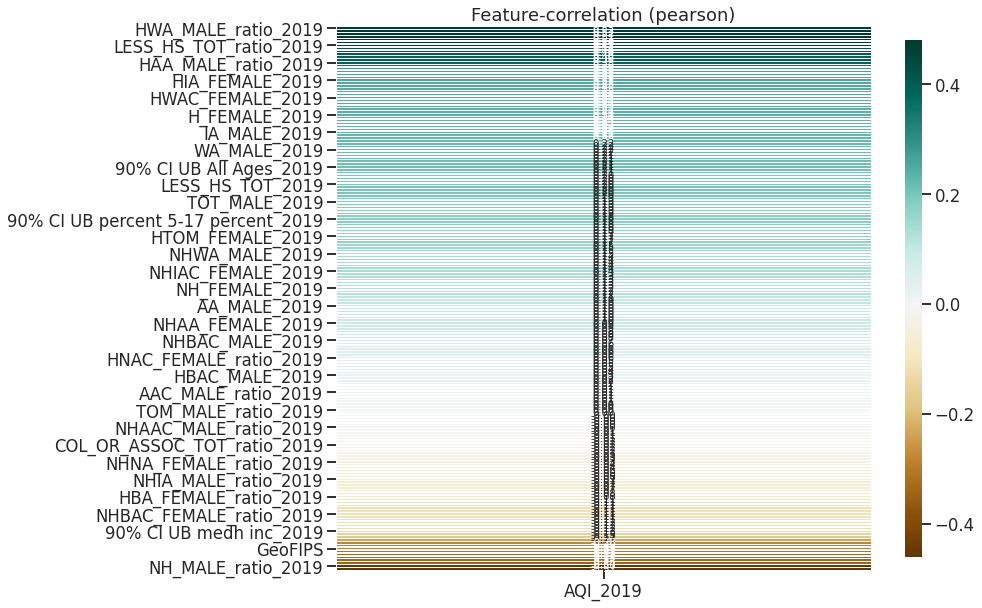

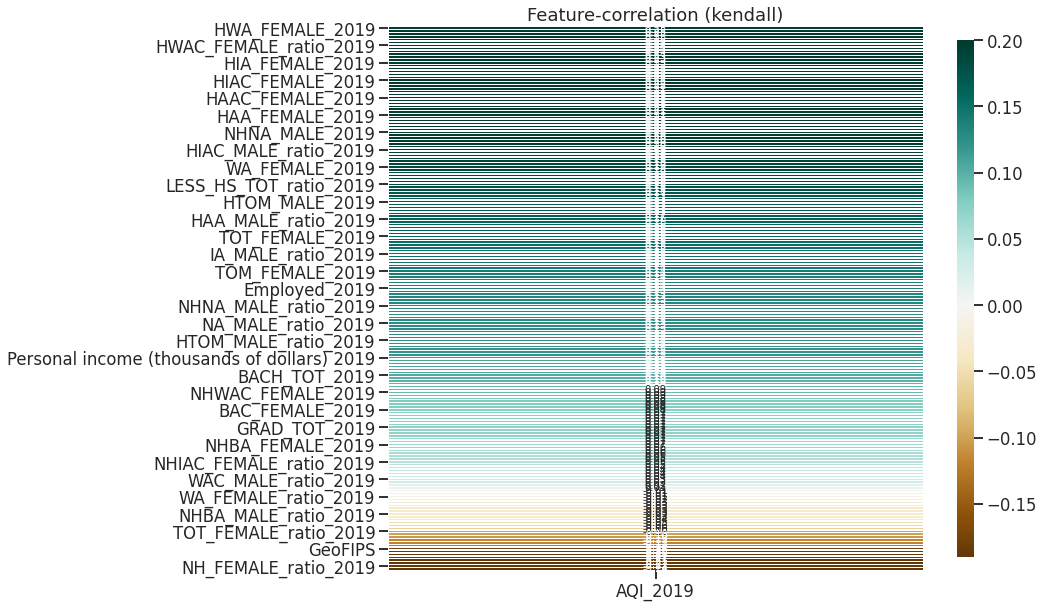

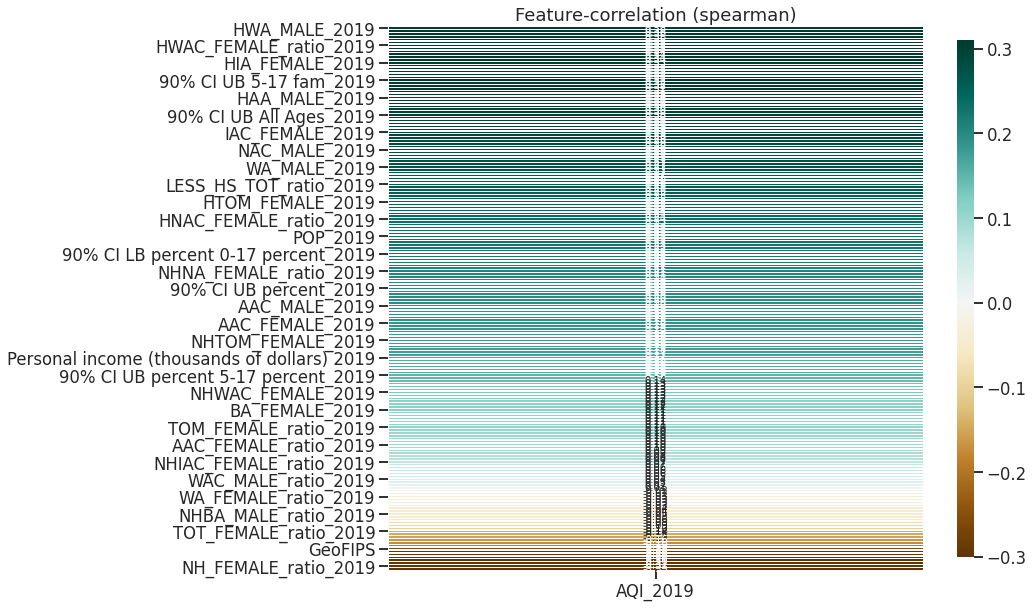

In [20]:
klib.corr_plot(df_2019, target='AQI_2019', method='pearson')
klib.corr_plot(df_2019, target='AQI_2019', method='kendall')
klib.corr_plot(df_2019, target='AQI_2019', method='spearman')

# Merge dataframe into df 2017-2019

In [21]:
pd.set_option('display.max_columns', 200)

df_2017_2018 = pd.merge(df_2017, df_2018, how='inner')
df_2017_2019 = pd.merge(df_2017_2018, df_2019, how='inner')

df_2017_2019

,GeoFIPS,State Name,County Name,AQI_2017,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,"Poverty Estimate, All Ages_2017",90% CI LB All Ages_2017,90% CI UB All Ages_2017,"Poverty Percent, All Ages_2017",90% CI LB percent_2017,90% CI UB percent_2017,"Poverty Estimate, Age 0-17_2017",90% CI LB percent 0-17_2017,90% CI UB 0-17_2017,"Poverty Percent, Age 0-17_2017",90% CI LB percent 0-17 percent_2017,90% CI UB 0-17 percent_2017,"Poverty Estimate, Age 5-17 in Families_2017",90% CI LB 5-17 fam_2017,90% CI UB 5-17 fam_2017,"Poverty Percent, Age 5-17 in Families_2017",90% CI LB 5-17 percent_2017,90% CI UB percent 5-17 percent_2017,Median Household Income_2017,90% CI Lower Bound LB medh inc_2017,90% CI UB medh inc_2017,Personal income (thousands of dollars) 2017,Per capita personal income (dollars) 2017,POP_2017,EDU_TOT_2017_2017,LESS_HS_TOT_2017_2017,HS_TOT_2017_2017,COL_OR_ASSOC_TOT_2017_2017,BACH_TOT_2017_2017,GRAD_TOT_2017_2017,VEHICLE_TOT_2017_2017,EDU_TOT_ratio_2017_2017,LESS_HS_TOT_ratio_2017_2017,HS_TOT_ratio_2017_2017,COL_OR_ASSOC_TOT_ratio_2017_2017,BACH_TOT_ratio_2017_2017,GRAD_TOT_ratio_2017_2017,VEHICLE_TOT_ratio_2017_2017,TOT_POP_2017,TOT_MALE_2017,TOT_FEMALE_2017,WA_MALE_2017,WA_FEMALE_2017,BA_MALE_2017,BA_FEMALE_2017,IA_MALE_2017,IA_FEMALE_2017,AA_MALE_2017,AA_FEMALE_2017,NA_MALE_2017,NA_FEMALE_2017,TOM_MALE_2017,TOM_FEMALE_2017,WAC_MALE_2017,WAC_FEMALE_2017,BAC_MALE_2017,BAC_FEMALE_2017,IAC_MALE_2017,IAC_FEMALE_2017,AAC_MALE_2017,AAC_FEMALE_2017,NAC_MALE_2017,NAC_FEMALE_2017,NH_MALE_2017,NH_FEMALE_2017,NHWA_MALE_2017,NHWA_FEMALE_2017,NHBA_MALE_2017,NHBA_FEMALE_2017,NHIA_MALE_2017,NHIA_FEMALE_2017,NHAA_MALE_2017,NHAA_FEMALE_2017,NHNA_MALE_2017,NHNA_FEMALE_2017,NHTOM_MALE_2017,NHTOM_FEMALE_2017,NHWAC_MALE_2017,NHWAC_FEMALE_2017,NHBAC_MALE_2017,NHBAC_FEMALE_2017,NHIAC_MALE_2017,NHIAC_FEMALE_2017,NHAAC_MALE_2017,NHAAC_FEMALE_2017,NHNAC_MALE_2017,NHNAC_FEMALE_2017,H_MALE_2017,H_FEMALE_2017,HWA_MALE_2017,HWA_FEMALE_2017,HBA_MALE_2017,...,NHAAC_MALE_2019,NHAAC_FEMALE_2019,NHNAC_MALE_2019,NHNAC_FEMALE_2019,H_MALE_2019,H_FEMALE_2019,HWA_MALE_2019,HWA_FEMALE_2019,HBA_MALE_2019,HBA_FEMALE_2019,HIA_MALE_2019,HIA_FEMALE_2019,HAA_MALE_2019,HAA_FEMALE_2019,HNA_MALE_2019,HNA_FEMALE_2019,HTOM_MALE_2019,HTOM_FEMALE_2019,HWAC_MALE_2019,HWAC_FEMALE_2019,HBAC_MALE_2019,HBAC_FEMALE_2019,HIAC_MALE_2019,HIAC_FEMALE_2019,HAAC_MALE_2019,HAAC_FEMALE_2019,HNAC_MALE_2019,HNAC_FEMALE_2019,TOT_MALE_ratio_2019,TOT_FEMALE_ratio_2019,WA_MALE_ratio_2019,WA_FEMALE_ratio_2019,BA_MALE_ratio_2019,BA_FEMALE_ratio_2019,IA_MALE_ratio_2019,IA_FEMALE_ratio_2019,AA_MALE_ratio_2019,AA_FEMALE_ratio_2019,NA_MALE_ratio_2019,NA_FEMALE_ratio_2019,TOM_MALE_ratio_2019,TOM_FEMALE_ratio_2019,WAC_MALE_ratio_2019,WAC_FEMALE_ratio_2019,BAC_MALE_ratio_2019,BAC_FEMALE_ratio_2019,IAC_MALE_ratio_2019,IAC_FEMALE_ratio_2019,AAC_MALE_ratio_2019,AAC_FEMALE_ratio_2019,NAC_MALE_ratio_2019,NAC_FEMALE_ratio_2019,NH_MALE_ratio_2019,NH_FEMALE_ratio_2019,NHWA_MALE_ratio_2019,NHWA_FEMALE_ratio_2019,NHBA_MALE_ratio_2019,NHBA_FEMALE_ratio_2019,NHIA_MALE_ratio_2019,NHIA_FEMALE_ratio_2019,NHAA_MALE_ratio_2019,NHAA_FEMALE_ratio_2019,NHNA_MALE_ratio_2019,NHNA_FEMALE_ratio_2019,NHTOM_MALE_ratio_2019,NHTOM_FEMALE_ratio_2019,NHWAC_MALE_ratio_2019,NHWAC_FEMALE_ratio_2019,NHBAC_MALE_ratio_2019,NHBAC_FEMALE_ratio_2019,NHIAC_MALE_ratio_2019,NHIAC_FEMALE_ratio_2019,NHAAC_MALE_ratio_2019,NHAAC_FEMALE_ratio_2019,NHNAC_MALE_ratio_2019,NHNAC_FEMALE_ratio_2019,H_MALE_ratio_2019,H_FEMALE_ratio_2019,HWA_MALE_ratio_2019,HWA_FEMALE_ratio_2019,HBA_MALE_ratio_2019,HBA_FEMALE_ratio_2019,HIA_MALE_ratio_2019,HIA_FEMALE_ratio_2019,HAA_MALE_ratio_2019,HAA_FEMALE_ratio_2019,HNA_MALE_ratio_2019,HNA_FEMALE_ratio_2019,HTOM_MALE_ratio_2019,HTOM_FEMALE_ratio_2019,HWAC_MALE_ratio_2019,HWAC_FEMALE_ratio_2019,HBAC_MALE_ratio_2019,HBAC_FEMALE_ratio_2019,HIAC_MALE_ratio_2019,HIAC_FEMALE_ratio_2019,HAAC_MALE_ratio_2019,HAAC_FEMALE_ratio_2019,HNAC_MALE_ratio_2019,HNAC_FEMALE_ratio_2019
0,1073,Alabama,J

# save data


In [22]:
# save 2017-2019 dataset
# data_path = r'../../data/processed/all_pm10_df_2017_2019'
# df_2017_2019.to_csv(data_path, index=False)
#
# save datasets for individual years
data_path = r'../../data/processed/all_pm10_df_2017'
df_2017.to_csv(data_path, index=False)
data_path = r'../../data/processed/all_pm10_df_2018'
df_2018.to_csv(data_path, index=False)
data_path = r'../../data/processed/all_pm10_df_2019'
df_2019.to_csv(data_path, index=False)

In [23]:
display(df_2017.corr()['AQI_2017'].sort_values().tail(15))
display(df_2018.corr()['AQI_2018'].sort_values().tail(15))
display(df_2019.corr()['AQI_2019'].sort_values().tail(15))

Unemployment_rate_2017         0.429663
HAA_FEMALE_ratio_2017          0.441761
LESS_HS_TOT_ratio_2017_2017    0.456038
HAA_MALE_ratio_2017            0.459683
HIAC_FEMALE_ratio_2017         0.499214
HIA_FEMALE_ratio_2017          0.503467
HIAC_MALE_ratio_2017           0.505687
HIA_MALE_ratio_2017            0.506966
H_FEMALE_ratio_2017            0.525979
HWA_FEMALE_ratio_2017          0.535365
HWAC_FEMALE_ratio_2017         0.535768
H_MALE_ratio_2017              0.552829
HWA_MALE_ratio_2017            0.561563
HWAC_MALE_ratio_2017           0.561756
AQI_2017                       1.000000
Name: AQI_2017, dtype: float64

Unemployment_rate_2018    0.462862
HAA_FEMALE_ratio_2018     0.466142
LESS_HS_TOT_ratio_2018    0.472371
HAA_MALE_ratio_2018       0.484867
HIA_FEMALE_ratio_2018     0.519462
HIAC_FEMALE_ratio_2018    0.521759
HIA_MALE_ratio_2018       0.522697
HIAC_MALE_ratio_2018      0.526081
H_FEMALE_ratio_2018       0.547916
HWA_FEMALE_ratio_2018     0.557753
HWAC_FEMALE_ratio_2018    0.558430
H_MALE_ratio_2018         0.573159
HWA_MALE_ratio_2018       0.582433
HWAC_MALE_ratio_2018      0.582798
AQI_2018                  1.000000
Name: AQI_2018, dtype: float64

HAA_FEMALE_ratio_2019     0.359445
HAA_MALE_ratio_2019       0.385246
HIAC_FEMALE_ratio_2019    0.391880
HIAC_MALE_ratio_2019      0.395088
HIA_FEMALE_ratio_2019     0.399759
HIA_MALE_ratio_2019       0.402144
Unemployment_rate_2019    0.415146
LESS_HS_TOT_ratio_2019    0.452503
H_FEMALE_ratio_2019       0.496121
HWAC_FEMALE_ratio_2019    0.508462
HWA_FEMALE_ratio_2019     0.509798
H_MALE_ratio_2019         0.516536
HWAC_MALE_ratio_2019      0.527989
HWA_MALE_ratio_2019       0.529591
AQI_2019                  1.000000
Name: AQI_2019, dtype: float64

In [24]:
display(df_2017.corr()['AQI_2017'].sort_values().head(15))
display(df_2018.corr()['AQI_2018'].sort_values().head(15))
display(df_2019.corr()['AQI_2019'].sort_values().head(15))

NH_FEMALE_ratio_2017       -0.554378
NH_MALE_ratio_2017         -0.518534
TOT_FEMALE_ratio_2017      -0.396427
NHWAC_FEMALE_ratio_2017    -0.353483
NHWA_FEMALE_ratio_2017     -0.352906
GeoFIPS                    -0.350214
NHWAC_MALE_ratio_2017      -0.335135
NHWA_MALE_ratio_2017       -0.335116
EDU_TOT_ratio_2017_2017    -0.333440
GRAD_TOT_ratio_2017_2017   -0.280057
BACH_TOT_ratio_2017_2017   -0.264309
BAC_FEMALE_ratio_2017      -0.207911
NHBAC_FEMALE_ratio_2017    -0.205735
BA_FEMALE_ratio_2017       -0.204319
NHBA_FEMALE_ratio_2017     -0.201482
Name: AQI_2017, dtype: float64

NH_FEMALE_ratio_2018      -0.573108
NH_MALE_ratio_2018        -0.542114
TOT_FEMALE_ratio_2018     -0.377488
NHWA_FEMALE_ratio_2018    -0.360279
NHWAC_FEMALE_ratio_2018   -0.359591
EDU_TOT_ratio_2018        -0.354234
GeoFIPS                   -0.348185
NHWA_MALE_ratio_2018      -0.345958
NHWAC_MALE_ratio_2018     -0.344799
GRAD_TOT_ratio_2018       -0.301252
BACH_TOT_ratio_2018       -0.277498
BAC_FEMALE_ratio_2018     -0.219283
NHBAC_FEMALE_ratio_2018   -0.216678
BA_FEMALE_ratio_2018      -0.215480
BAC_MALE_ratio_2018       -0.214033
Name: AQI_2018, dtype: float64

NH_FEMALE_ratio_2019                        -0.511540
NH_MALE_ratio_2019                          -0.496329
NHWAC_FEMALE_ratio_2019                     -0.343210
NHWA_FEMALE_ratio_2019                      -0.341380
NHWAC_MALE_ratio_2019                       -0.334176
NHWA_MALE_ratio_2019                        -0.332598
EDU_TOT_ratio_2019                          -0.306762
GeoFIPS                                     -0.294129
GRAD_TOT_ratio_2019                         -0.282349
TOT_FEMALE_ratio_2019                       -0.276709
BACH_TOT_ratio_2019                         -0.231886
Per capita personal income (dollars) 2019   -0.173509
HS_TOT_ratio_2019                           -0.154046
90% CI UB medh inc_2019                     -0.131547
VEHICLE_TOT_ratio_2019                      -0.124735
Name: AQI_2019, dtype: float64

In [25]:
display(df_2017.shape)
display(df_2018.shape)
display(df_2019.shape)

(208, 191)

(208, 191)

(208, 191)

# Result
One of the lesser recorded pollutants, pm10, We have less observations for this measure.
We drop from 1000 counties to 210 counties.
Similar yield as SO2 results.

## postive covariance
Correlation is consistent we get high r values of .56
* HWAC and HWA ethnicity show most consistent as top feature with highest covariance (.52 - .58)
* Unuemployment rate another features as well
* Seems like counties with high hispanic ratios have more positive covariance with pm10 polutant

## negative covariance
Consistent negative covariances
* Appears that for all 3 years counties with less Non hispanic females have lowest aqi
* income and education features have a weak-moderate negative covariance

In [26]:
df_2017.columns.tolist()

['GeoFIPS',
 'State Name',
 'County Name',
 'AQI_2017',
 'Civilian_labor_force_2017',
 'Employed_2017',
 'Unemployed_2017',
 'Unemployment_rate_2017',
 'Poverty Estimate, All Ages_2017',
 '90% CI LB All Ages_2017',
 '90% CI UB All Ages_2017',
 'Poverty Percent, All Ages_2017',
 '90% CI LB percent_2017',
 '90% CI UB percent_2017',
 'Poverty Estimate, Age 0-17_2017',
 '90% CI LB percent 0-17_2017',
 '90% CI UB 0-17_2017',
 'Poverty Percent, Age 0-17_2017',
 '90% CI LB percent 0-17 percent_2017',
 '90% CI UB 0-17 percent_2017',
 'Poverty Estimate, Age 5-17 in Families_2017',
 '90% CI LB 5-17 fam_2017',
 '90% CI UB 5-17 fam_2017',
 'Poverty Percent, Age 5-17 in Families_2017',
 '90% CI LB 5-17 percent_2017',
 '90% CI UB percent 5-17 percent_2017',
 'Median Household Income_2017',
 '90% CI Lower Bound LB medh inc_2017',
 '90% CI UB medh inc_2017',
 'Personal income (thousands of dollars) 2017',
 'Per capita personal income (dollars) 2017',
 'POP_2017',
 'EDU_TOT_2017_2017',
 'LESS_HS_TOT_20

In [27]:
educ_vehicle_2017.columns.tolist()

['GeoFIPS',
 'POP_2017',
 'EDU_TOT_2017_2017',
 'LESS_HS_TOT_2017_2017',
 'HS_TOT_2017_2017',
 'COL_OR_ASSOC_TOT_2017_2017',
 'BACH_TOT_2017_2017',
 'GRAD_TOT_2017_2017',
 'VEHICLE_TOT_2017_2017',
 'EDU_TOT_ratio_2017_2017',
 'LESS_HS_TOT_ratio_2017_2017',
 'HS_TOT_ratio_2017_2017',
 'COL_OR_ASSOC_TOT_ratio_2017_2017',
 'BACH_TOT_ratio_2017_2017',
 'GRAD_TOT_ratio_2017_2017',
 'VEHICLE_TOT_ratio_2017_2017']

In [29]:
educ_vehicle_2017_2019.columns.tolist()

['GeoFIPS',
 'NAME',
 'state',
 'county',
 'POP_2017',
 'EDU_TOT_2017_2017',
 'LESS_HS_TOT_2017_2017',
 'HS_TOT_2017_2017',
 'COL_OR_ASSOC_TOT_2017_2017',
 'BACH_TOT_2017_2017',
 'GRAD_TOT_2017_2017',
 'VEHICLE_TOT_2017_2017',
 'EDU_TOT_ratio_2017_2017',
 'LESS_HS_TOT_ratio_2017_2017',
 'HS_TOT_ratio_2017_2017',
 'COL_OR_ASSOC_TOT_ratio_2017_2017',
 'BACH_TOT_ratio_2017_2017',
 'GRAD_TOT_ratio_2017_2017',
 'VEHICLE_TOT_ratio_2017_2017',
 'POP_2018',
 'EDU_TOT_2018',
 'LESS_HS_TOT_2018',
 'HS_TOT_2018',
 'COL_OR_ASSOC_TOT_2018',
 'BACH_TOT_2018',
 'GRAD_TOT_2018',
 'VEHICLE_TOT_2018',
 'EDU_TOT_ratio_2018',
 'LESS_HS_TOT_ratio_2018',
 'HS_TOT_ratio_2018',
 'COL_OR_ASSOC_TOT_ratio_2018',
 'BACH_TOT_ratio_2018',
 'GRAD_TOT_ratio_2018',
 'VEHICLE_TOT_ratio_2018',
 'POP_2019',
 'EDU_TOT_2019',
 'LESS_HS_TOT_2019',
 'HS_TOT_2019',
 'COL_OR_ASSOC_TOT_2019',
 'BACH_TOT_2019',
 'GRAD_TOT_2019',
 'VEHICLE_TOT_2019',
 'EDU_TOT_ratio_2019',
 'LESS_HS_TOT_ratio_2019',
 'HS_TOT_ratio_2019',
 'COL_OR